1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
%matplotlib inline

In [2]:
N = 10000
mu = [0, 0]
sigma = [1, 3]
x1 = np.random.normal(mu[0], sigma[0], size=(N, 1))
x2 = np.random.normal(mu[1], sigma[1], size=(N, 1))
x3 = 2*x1 + x2
X  = np.hstack([x1, x2, x3])
X


array([[-0.84692606, -0.18234444, -1.87619656],
       [ 0.09929622,  0.88388276,  1.08247521],
       [ 1.73916819,  3.44058488,  6.91892127],
       ...,
       [ 0.16790559,  2.20701931,  2.5428305 ],
       [-0.12376081, -1.48360556, -1.73112719],
       [-0.071432  , -2.93211328, -3.07497728]])

In [3]:
l, V = la.eig(np.cov(X.T))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)


eigenvalues :
 [2.06855407e+01+0.j 3.56995476e-16+0.j 2.65463040e+00+0.j]
eigenvectors:
 [[-0.08504854 -0.81649658  0.57105173]
 [-0.61434414 -0.40824829 -0.67521449]
 [-0.78444121  0.40824829  0.46688897]]


In [4]:
U, spectrum, Vt = np.linalg.svd(X.T)
l_svd = spectrum**2/(N-1)
V_svd = U

print('eigenvalues :\n', l_svd)
print('eigenvectors:\n', V_svd)

eigenvalues :
 [2.06856096e+01 2.65465736e+00 3.71024925e-32]
eigenvectors:
 [[-0.08504717  0.57105193 -0.81649658]
 [-0.61434576 -0.67521302 -0.40824829]
 [-0.7844401   0.46689085  0.40824829]]


The two biggest eigenvalues are comparable, while the third one, the smallest, is quite differente between the two methods, probably due to differences in precision implementation in the two algorithms.

On the other hand there is a correspondence between the two eigenvectors' sets.

In [5]:
m     = np.argsort(l)[::-1]
l_ord = l[m]
perc  = (l_ord[0] + l_ord[1]) / l.sum()
print("The first two principal components express the %.4f %% of the dataset variability" %(np.real_if_close(perc)*100))

Lambda = np.diag(l)
print(Lambda)
print("A.trace():", np.cov(X.T).trace())
print("Lambda.trace():", Lambda.trace())

print('Ratio between eigenvalues and trace:\n', Lambda/Lambda.trace())

The first two principal components express the 100.0000 % of the dataset variability
[[2.06855407e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 3.56995476e-16+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 2.65463040e+00+0.j]]
A.trace(): 23.340171075318978
Lambda.trace(): (23.340171075319027+0j)
Ratio between eigenvalues and trace:
 [[8.86263456e-01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 1.52953239e-17+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 1.13736544e-01+0.j]]


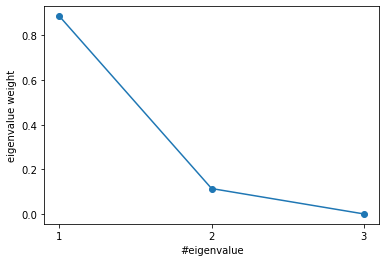

In [6]:
l_svd[::-1].sort()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(len(l_svd))+1, np.real_if_close(l_svd/l_svd.sum()), '-o')
ax1.set_ylabel('eigenvalue weight')
ax1.set_xlabel('#eigenvalue')
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.show()

In [7]:
X_rot = np.dot(V.T, X.T)
X_rot

array([[ 1.65581797e+00, -1.40059136e+00, -7.68910388e+00, ...,
        -3.36485056e+00,  2.27993758e+00,  4.21954073e+00],
       [ 3.54189725e-16,  7.70587743e-17, -4.31630489e-16, ...,
         2.01825051e-16, -1.79823390e-16, -4.65385264e-16],
       [-1.23649246e+00, -3.47114257e-02,  1.90039030e+00, ...,
        -2.07109113e-01,  1.22833950e-01,  5.03341015e-01]])

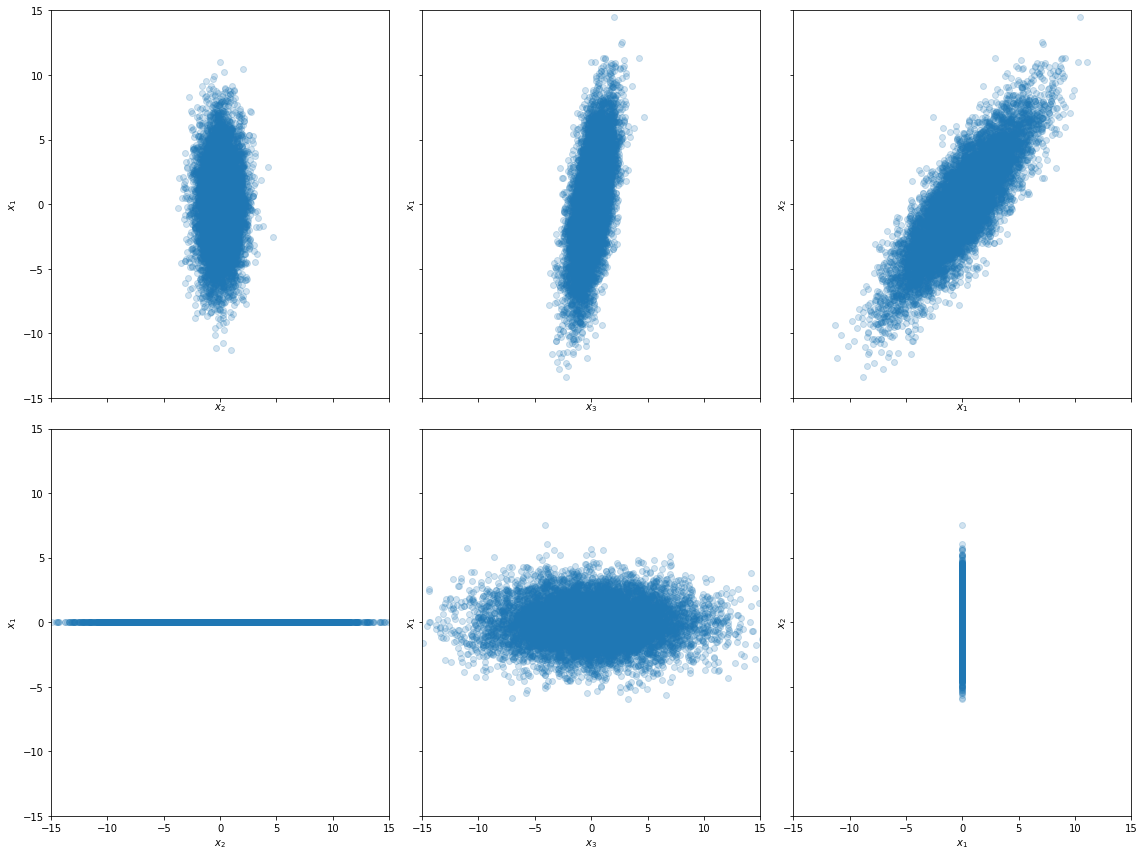

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12), sharey=True, sharex=True)
ax[0,0].scatter(X[:,0], X[:,1], marker = 'o', alpha = 0.2)
ax[0,0].set_ylabel('$x_{0}$'.format(1))
ax[0,0].set_xlabel('$x_{0}$'.format(2))
ax[0,1].scatter(X[:,0], X[:,2], marker = 'o', alpha = 0.2)
ax[0,1].set_ylabel('$x_{0}$'.format(1))
ax[0,1].set_xlabel('$x_{0}$'.format(3))
ax[0,2].scatter(X[:,1], X[:,2], marker = 'o', alpha = 0.2)
ax[0,2].set_ylabel('$x_{0}$'.format(2))
ax[0,2].set_xlabel('$x_{0}$'.format(1))
ax[1,0].scatter(X_rot[0,:], X_rot[1,:], marker = 'o', alpha = 0.2)
ax[1,0].set_ylabel('$x_{0}$'.format(1))
ax[1,0].set_xlabel('$x_{0}$'.format(2))
ax[1,1].scatter(X_rot[0,:], X_rot[2,:], marker = 'o', alpha = 0.2)
ax[1,1].set_ylabel('$x_{0}$'.format(1))
ax[1,1].set_xlabel('$x_{0}$'.format(3))
ax[1,2].scatter(X_rot[1,:], X_rot[2,:], marker = 'o', alpha = 0.2)
ax[1,2].set_ylabel('$x_{0}$'.format(2))
ax[1,2].set_xlabel('$x_{0}$'.format(1))
ax[1,0].set_ylim(-15, 15)
ax[1,0].set_xlim(-15, 15)
plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [9]:
std = 1 / 50
X_noise = np.random.normal(scale = std, size=(N, 10))
X_new = np.concatenate((X, X_noise), axis = 1)

U, spectrum, Vt = np.linalg.svd(X_new.T)
l_svd = spectrum**2/(N-1)
V_svd = U

print('eigenvalues :\n', l_svd)
print('eigenvectors:\n', V_svd)

m     = np.argsort(l)[::-1]
l_ord = l[m]
perc  = (l_ord[0] + l_ord[1]) / l.sum()
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(perc)*100))

Lambda = np.diag(l)
print(Lambda)
print("A.trace():", np.cov(X_new.T).trace())
print("Lambda.trace():", Lambda.trace())

print('Ratio between eigenvalues and trace:\n', Lambda/Lambda.trace())

eigenvalues :
 [2.06856102e+01 2.65465793e+00 4.24696967e-04 4.16115332e-04
 4.10255859e-04 4.07791299e-04 3.99891013e-04 3.98701398e-04
 3.95361064e-04 3.87324079e-04 3.84091246e-04 3.78455901e-04
 5.83407219e-32]
eigenvectors:
 [[-8.50471641e-02  5.71051879e-01 -6.26952008e-05  9.59793062e-05
  -4.61815689e-05  4.60569934e-05  5.73807087e-05 -3.21607356e-05
  -6.58023589e-05 -8.25010141e-05 -1.70449391e-04 -5.18268172e-05
  -8.16496581e-01]
 [-6.14345755e-01 -6.75212906e-01  7.60786347e-05 -1.39939417e-04
   1.09348938e-04 -6.22725790e-05 -1.51965880e-04  4.21287628e-05
   9.72336215e-05  1.47184660e-04  2.41719396e-04  5.18426213e-05
  -4.08248290e-01]
 [-7.84440083e-01  4.66890852e-01 -4.93117669e-05  5.20191954e-05
   1.69858003e-05  2.98414078e-05 -3.72044628e-05 -2.21927083e-05
  -3.43710962e-05 -1.78173678e-05 -9.91793873e-05 -5.18110130e-05
   4.08248290e-01]
 [ 1.66443163e-05  2.62748393e-05  4.82161049e-01  1.93909821e-01
   2.60062343e-01 -1.87537892e-01 -5.44170742e-02 -6.

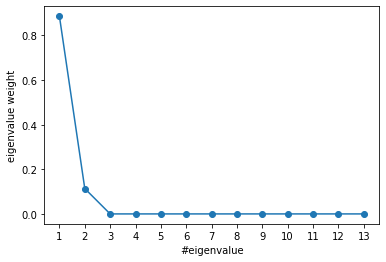

In [10]:
l_svd[::-1].sort()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(len(l_svd))+1, np.real_if_close(l_svd/l_svd.sum()), '-o')
ax1.set_ylabel('eigenvalue weight')
ax1.set_xlabel('#eigenvalue')
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


eigenvalues :
 [4.51137809+0.j 0.24775675+0.j 0.        +0.j]
eigenvectors:
 [[ 0.99970925 -0.02411273  0.        ]
 [ 0.02411273  0.99970925  0.        ]
 [ 0.          0.          1.        ]]
The first two principal components express the 100.00 % of the dataset variability


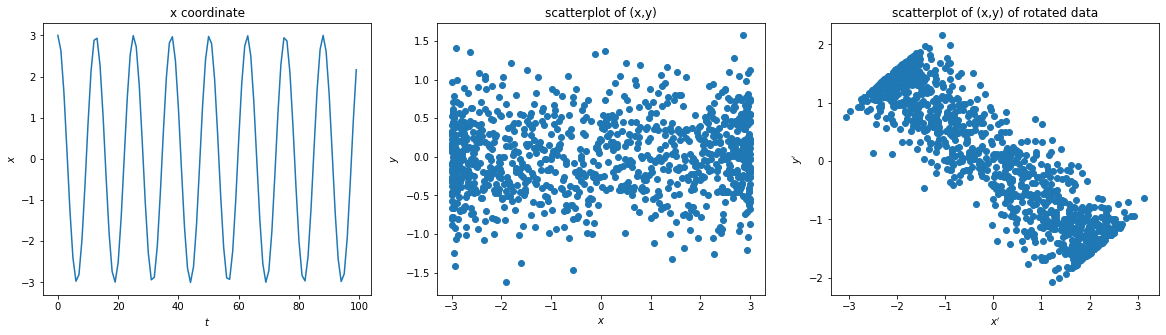

In [11]:
N = 1000
ϕ = 0.
ω = 0.5
A = 3
t = np.arange(N)

def motion(t, A, ω, ϕ):
    return A * np.cos(ω*t + ϕ)

x = motion(t, A, ω, ϕ).reshape(-1, 1)
y = np.random.normal(scale = 0.5, size = (N, 1))
z = np.zeros((N, 1))

X = np.concatenate((x, y, z), axis = 1)

l, V = la.eig(np.cov(X.T))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)

m     = np.argsort(l)[::-1]
l_ord = l[m]
perc  = (l_ord[0] + l_ord[1]) / l.sum()
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(perc)*100))


fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
ax1.plot(t[:int(N/10)], X[:int(N/10),0])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$')
ax1.set_title('x coordinate')
ax2.scatter(X[:,0], X[:,1])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('scatterplot of (x,y)')

def rotation(X, Theta, Phi):
    Theta = Theta*np.pi/180
    Phi = Phi*np.pi/180
    Rtheta = np.array([[1, 0, 0],
                      [0, np.cos(Theta), np.sin(Theta)],
                      [0, -np.sin(Theta), np.cos(Theta)]])
    Rphi = np.array([[np.cos(Phi), np.sin(Phi), 0],
                    [-np.sin(Phi), np.cos(Phi), 0],
                    [0, 0, 1]])
    R = np.dot(Rtheta, Rphi)
    return np.dot(R, X.T).T, R

Xr, R = rotation(X, 45, 45)
ax3.scatter(Xr[:,0], Xr[:,1])
ax3.set_xlabel("$x'$")
ax3.set_ylabel("$y'$")
ax3.set_title('scatterplot of (x,y) of rotated data')
plt.show()

eigenvalues :
 [4.51137809e+00+0.j 2.47756750e-01+0.j 3.29992326e-32+0.j]
eigenvectors:
 [[ 7.23951460e-01 -6.89850914e-01  3.06379865e-16]
 [-4.87798259e-01 -5.11910986e-01  7.07106781e-01]
 [ 4.87798259e-01  5.11910986e-01  7.07106781e-01]]
The first two principal components express the 100.00 % of the dataset variability
The first two principal components express the 94.79 % of the dataset variability
[[4.51137809e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.47756750e-01+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 3.29992326e-32+0.j]]
A.trace(): 4.759134844154021
Lambda.trace(): (4.75913484415402+0j)
Ratio between eigenvalues and trace:
 [[9.47940801e-01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 5.20591994e-02+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 6.93387217e-33+0.j]]


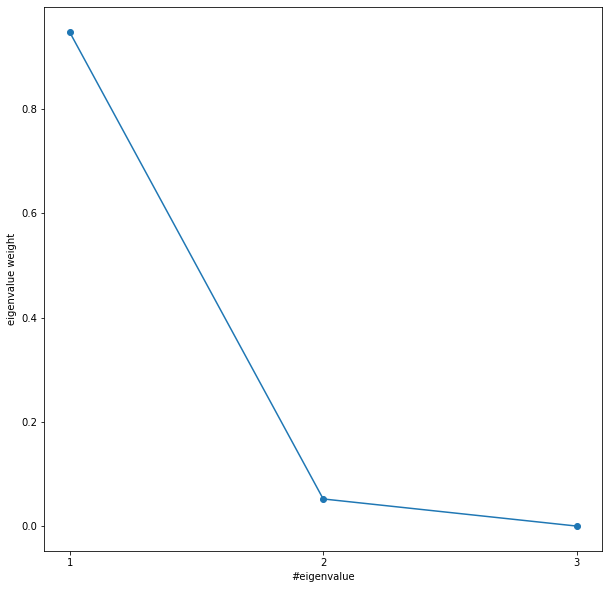

In [12]:
l, V = la.eig(np.cov(Xr.T))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)

m     = np.argsort(l)[::-1]
l_ord = l[m]
perc1  =  l_ord[0]             / l.sum()
perc2  = (l_ord[0] + l_ord[1]) / l.sum()

print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(perc2)*100))
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(perc1)*100))

Lambda = np.diag(l)
print(Lambda)
print("A.trace():", np.cov(Xr.T).trace())
print("Lambda.trace():", Lambda.trace())

print('Ratio between eigenvalues and trace:\n', Lambda/Lambda.trace())

l[::-1].sort()
fig, ax1 = plt.subplots(figsize = (10, 10))
ax1.plot(np.arange(len(l))+1, np.real_if_close(l/l.sum()), '-o')
ax1.set_ylabel('eigenvalue weight')
ax1.set_xlabel('#eigenvalue')
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.show()


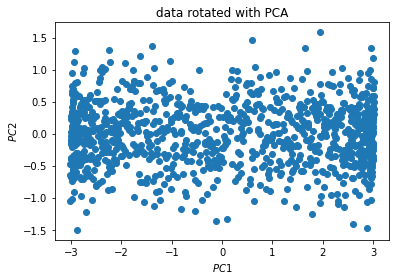

[[-7.23951548e-01 -6.89850822e-01  3.41757388e-16]
 [ 4.87798194e-01 -5.11911049e-01  7.07106781e-01]
 [-4.87798194e-01  5.11911049e-01  7.07106781e-01]]
[[ 0.70710678  0.70710678  0.        ]
 [-0.5         0.5         0.70710678]
 [ 0.5        -0.5         0.70710678]]


In [13]:
U, spectrum, Vt = np.linalg.svd(Xr.T)
l_svd = spectrum**2/(N-1)
V_svd = U


Xrr = np.dot(Xr, U) #Applying PCA rotation
plt.plot(Xrr[:,0], Xrr[:,1], 'o')
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.title('data rotated with PCA')
plt.show()
print(U)
print(la.inv(R).T)

eigenvalues :
 [2.70682687e+01 1.48660990e+00 2.98135910e-30 2.37913185e-32
 1.66363934e-32 1.03335666e-32 8.47905961e-33 6.14016279e-33
 5.39798797e-33 4.83000970e-33 4.50459056e-33 4.04581938e-33
 3.38443283e-33 2.69870380e-33 2.58165679e-33 1.67026854e-33
 2.94092590e-64 1.39801296e-65]
eigenvectors:
 [[-4.50775936e-02  6.67522204e-02  9.93862131e-01 ... -1.11665180e-03
  -3.47138805e-03  4.81043342e-03]
 [-3.92866597e-02  1.03455122e-02 -3.95741942e-02 ... -1.24166201e-03
   2.78882981e-02  1.87527757e-03]
 [-2.42520463e-02  1.77592878e-02 -2.52440973e-03 ... -4.52701077e-05
   3.74112670e-04  1.38688455e-04]
 ...
 [ 2.36671557e-02 -2.70664016e-03  1.85869129e-03 ...  9.95805218e-01
   1.94480784e-03  1.08015428e-03]
 [ 3.91593853e-02 -3.86014192e-02  7.43284640e-03 ...  1.50083011e-03
   9.58923195e-01  2.96362483e-03]
 [ 4.47417559e-02 -8.03084531e-03 -5.06106816e-03 ...  2.47268795e-04
   6.17753363e-03  9.50827369e-01]]
The first two principal components express the 100.00 % of

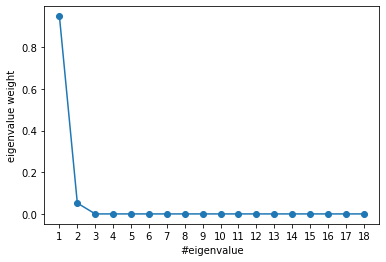

In [14]:
theta = np.array([0, 30,  60,  90, 120, 150], dtype=int)
phi   = np.array([0, 60, 120, 180, 240, 300], dtype=int)

n     = theta.size

data = np.zeros((N, 3*n))
for i in range(n):
    data[:, 3*i:3*i+3], _ = rotation(X, theta[i], phi[i])

#names = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6']
#data  = pd.DataFrame(data, columns=names)
#data

U, spectrum, Vt = np.linalg.svd(data)
l_svd = spectrum**2/(N-1)
V_svd = U

print('eigenvalues :\n', l_svd)
print('eigenvectors:\n', V_svd)

m     = np.argsort(l)[::-1]
l_ord = l[m]
perc  = (l_ord[0] + l_ord[1]) / l.sum()
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(perc)*100))

Lambda = np.diag(l)
print(Lambda)
print("A.trace():", np.cov(X_new.T).trace())
print("Lambda.trace():", Lambda.trace())

print('Ratio between eigenvalues and trace:\n', Lambda/Lambda.trace())

l_svd[::-1].sort()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(len(l_svd))+1, np.real_if_close(l_svd/l_svd.sum()), '-o')
ax1.set_ylabel('eigenvalue weight')
ax1.set_xlabel('#eigenvalue')
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [15]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ../data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ../data/
#!cat ../data/magic04.data
!cat ../data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [16]:
header = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
          'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data   = pd.read_csv('../data/magic04.data', names=header)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


eigenvalues :
 [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j]
eigenvectors:
 [[ 3.27812305e-01  1.34406332e-01 -6.55078481e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [ 1.13810001e-01  5.38837224e-02  1.89938175e-02 -3.19766485e-01
   1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158421e-05]
 [ 3.06076690e-03 -6.59372017e-04 -1.05931761e-03 -6.93028658e-03
  -2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [-9.27109146e-04  2.58205308e-04  5.10399700e-04  2.60555110e-03
   1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [-5.21882399e-04  1.52710005e-04  2.94635944e-04  1.51275933e-03
   9.19340567e-04 -2.21501607e-05  1.8138

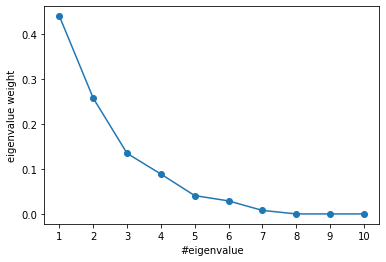

In [17]:
X = data.values[:,:-1].astype(float)
l, V = la.eig(np.cov(X.T))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)

m     = np.argsort(l)[::-1]
l_ord = l[m]
perc  = (l_ord[0] + l_ord[1]) / l.sum()
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(perc)*100))

Lambda = np.diag(l)
print(Lambda)
print("A.trace():", np.cov(X.T).trace())
print("Lambda.trace():", Lambda.trace())

print('Ratio between eigenvalues and trace:\n', Lambda/Lambda.trace())

l[::-1].sort()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(len(l))+1, np.real_if_close(l/l.sum()), '-o')
ax1.set_ylabel('eigenvalue weight')
ax1.set_xlabel('#eigenvalue')
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.show()


In [18]:
X_rot = np.dot(V.T, X.T)
X_rot

print("Covariance matrix:\n", np.cov(X_rot.T))

Covariance matrix:
 [[ 1178.88435712  2121.53447732  3643.28709029 ...  2818.64430351
   4296.86272642  2214.64459437]
 [ 2121.53447732  4801.86264204  6736.87938907 ...  6086.41702241
   9142.54060539  5160.86945378]
 [ 3643.28709029  6736.87938907 15047.26650678 ...  9108.68162286
  16262.08038386 10544.84586754]
 ...
 [ 2818.64430351  6086.41702241  9108.68162286 ...  8245.20877712
  12222.27997121  8090.63656892]
 [ 4296.86272642  9142.54060539 16262.08038386 ... 12222.27997121
  20839.7492142  14126.00326207]
 [ 2214.64459437  5160.86945378 10544.84586754 ...  8090.63656892
  14126.00326207 14711.9830922 ]]
